In [1]:
import pandas as pd
import numpy as np
import random
from no_ip_no_data import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



normal_df = pd.read_csv('data/normal1.csv')
processed_normal = process_df(normal_df)

attack_df = pd.read_csv('data/attack1.csv')
processed_attack = process_df(attack_df)

In [2]:
processed_normal

,length,ip.proto,ip.len,ip.tos,ip.ttl,load.count,FIN,SYN,RST,PSH,...,destination_docker_bridge,destination_dns,destination_service,destination_pod,destination_external,protocol.sport,protocol.dport,TCP,UDP,packet_flow
0,0.002746,0.0,0.002746,0.0,0.119403,0.002380,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.810438,0.050287,1.0,0.0,0.359557
1,0.002746,0.0,0.002746,0.0,0.114428,0.002380,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.810438,0.050287,1.0,0.0,0.359557
2,0.000366,0.0,0.000366,0.5,0.119403,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.049919,0.816414,1.0,0.0,0.359557
3,0.000732,0.0,0.000732,0.5,0.119403,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.049919,0.816414,1.0,0.0,0.359557
4,0.004027,0.0,0.004027,0.5,0.119403,0.003662,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.049919,0.816414,1.0,0.0,0.359557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140533,0.004545,0.0,0.004545,0.0,0.119403,0.004181,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.123178,0.778448,1.0,0.0,0.000000
140534,0.000366,0.0,0.000366,0.0,0.119403,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.772750,0.124086,1.0,0.0,0.000000
140535,0.000366,0.0,0.000366,0.0,0.119403,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.123178,0.778448,1.0,0.0,0.000000
140536,0.000366,0.0,0.000366,0.0,0.119403,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.772750,0.124086,1.0,0.0,0.000000


In [3]:
normal_values = processed_normal.values
attack_values = processed_attack.values

from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(
    normal_values, test_size=0.2, random_state=42)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(20, input_dim=normal_values.shape[1], activation='LeakyReLU'))
model.add(Dense(3, activation='LeakyReLU')) # size to compress to
model.add(Dense(20, activation='LeakyReLU'))
model.add(Dense(normal_values.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=30)
model.save("no_ip_no_load_boi")

Metal device set to: Apple M1 Pro
Epoch 1/30


2022-03-19 11:40:09.798099: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-19 11:40:09.798220: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-19 11:40:09.872977: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-19 11:40:09.981522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3514/3514 [==============================] - 13s 4ms/step - loss: 0.0157
Epoch 2/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0065
Epoch 3/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0049
Epoch 4/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0038
Epoch 5/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0036
Epoch 6/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0034
Epoch 7/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0032
Epoch 8/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0031
Epoch 9/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0030
Epoch 10/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0029
Epoch 11/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0028
Epoch 12/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0027


2022-03-19 11:46:33.992132: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: no_ip_no_load_boi/assets


INFO:tensorflow:Assets written to: no_ip_no_load_boi/assets


2022-03-19 11:46:34.249713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.04647648295303748
0.04587238165010569


<AxesSubplot:>

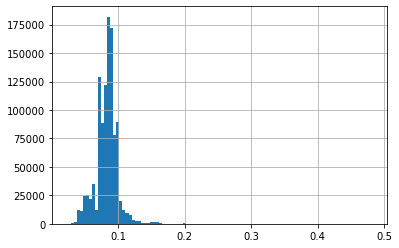

In [4]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))


# In[10]:


pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))


# In[12]:


pred_attack = model.predict(attack_values)

score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],attack_values[index])))

attack_df['score'] = score_list


# In[13]:


attack_df['score'].hist(bins = 100)

0.09048084718478559

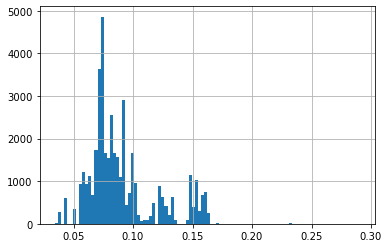

In [5]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']


# In[15]:


nmap_df['score'].hist(bins = 100)


# In[20]:


nmap_df['score'].mean()

<AxesSubplot:>

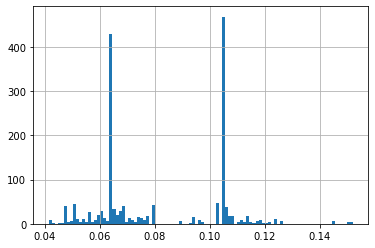

In [6]:
normal_wordpress = attack_df[attack_df["ip.dst"] == '89.100.107.147']


# In[23]:


normal_wordpress['score'].hist(bins=100)